## Classification using Stochastic Gradient Descent and KNeighbors classifier

#### 1. Acquire dataset
We have the data set saved in the github repo itself. So we can directly load it.

In [1]:
from scipy.io import loadmat
mnist_path = './dataset/mnist-original.mat'
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [2]:
mnist

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

*The MNIST dataset is already divided into test and training data.*

* Training instances = 60,000
* Test instances     = 10,000
* Total              = 70,000

*We can get these sections like this*

In [4]:
X, y = mnist["data"], mnist["target"]

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt

In [8]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

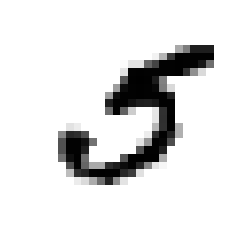

In [9]:
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y[36000]

5.0

In [11]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [12]:
import numpy as np

In [13]:
shuffle_index = np.random.permutation(60000)

In [14]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

*We train a binary classifier for the digit 5*

In [15]:
y_train_5 = (y_train == 5) # Only true for 5s and False for all other digits

In [16]:
y_test_5 = (y_test == 5)

*Now we train a Stochastic Gradient Classifier*

In [17]:
from sklearn.linear_model import SGDClassifier

In [18]:
sgd_clf = SGDClassifier(random_state=42)

In [19]:
sgd_clf.fit(X_train, y_train_5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [20]:
sgd_clf.predict([some_digit])

array([False])

*Implementing cross-validation*

In [21]:
from sklearn.model_selection import StratifiedKFold

In [22]:
from sklearn.base import clone

In [23]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [24]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9611


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.95695


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.88975


*Evaluate our model using cross_val_score()*

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

array([0.9611 , 0.95695, 0.88975])

*Dumb classifier for not-5 class*

In [27]:
from sklearn.base import BaseEstimator

In [28]:
class Never5Classifier(BaseEstimator):
    
    def fit(self, X, y=None):
        pass

    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [29]:
# let's try out the accuracy of our dumb classifier
never_5_clf = Never5Classifier()


In [30]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90635, 0.9113 , 0.9113 ])

*Confusion Matrix*

In [31]:
from sklearn.model_selection import cross_val_predict

In [32]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_train_5, y_train_pred)

array([[51826,  2753],
       [ 1091,  4330]])

In [35]:
# ideal confusion matrix has non-zero elements only in the diagnol like this...
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

*Let's find out the precision and recall*

In [36]:
from sklearn.metrics import precision_score, recall_score

In [37]:
precision_score(y_train_5, y_train_pred)

0.6113228857828603

In [38]:
recall_score(y_train_5, y_train_pred)

0.7987456188895038

In [39]:
from sklearn.metrics import f1_score

In [40]:
print("Veer the F1 score is = ", f1_score(y_train_5, y_train_pred))

Veer the F1 score is =  0.6925783749200255


In [41]:
y_scores = sgd_clf.decision_function([some_digit])

In [42]:
y_scores

array([-90932.29067082])

In [43]:
threshold = 0

In [44]:
y_some_digit_pred = (y_scores > threshold)

In [45]:
y_some_digit_pred

array([False])

In [46]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

In [47]:
y_scores

array([ -763154.99979624, -1178479.55364974,  -439600.8527607 , ...,
        -117475.68467376,  -166964.7368581 ,   103696.85847321])

In [48]:
from sklearn.metrics import precision_recall_curve

In [49]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [50]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    

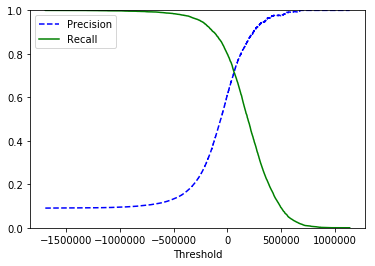

In [51]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

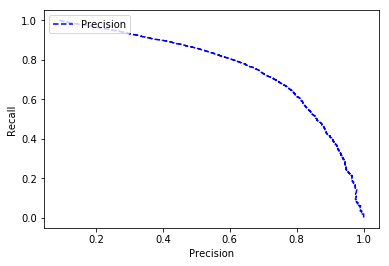

In [52]:
plt.plot(precisions, recalls, "b--", label="Precision")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="upper left")
#     plt.ylim([0, 1])

In [53]:
y_train_pred_90 = (y_scores > 90000)

In [54]:
precision_score(y_train_5, y_train_pred_90)

0.7572875749431466

In [55]:
recall_score(y_train_5, y_train_pred_90)

0.6757055893746541

If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

In [56]:
from sklearn.metrics import roc_curve

In [57]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
# fpr = false positive rate = (1 - true negative rate)
# tpr = true positive rate

In [58]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    

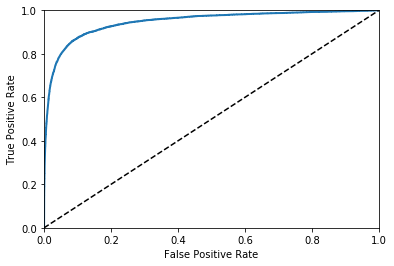

In [59]:
plot_roc_curve(fpr, tpr, "Roc Curve")
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
roc_auc_score(y_train_5, y_scores)

0.9468685320908504

*Random Forest Classifier*

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
forest_clf = RandomForestClassifier(random_state=42)

In [64]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method="predict_proba")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [65]:
y_scores_forest = y_probas_forest[:, 1] # select 1'st column as scores as it is the probability 
# of the positive class

In [66]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

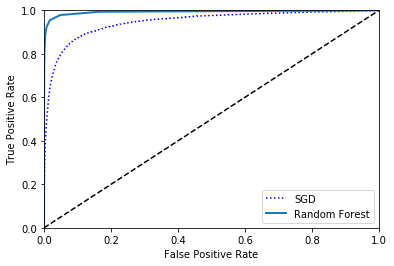

In [67]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [68]:
roc_auc_score(y_train_5, y_scores_forest)

0.9929937838582835

MultiClass Classification

In [69]:
sgd_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [70]:
sgd_clf.predict([some_digit])

array([0.])

In [71]:
some_digit_scores = sgd_clf.decision_function([some_digit])

In [72]:
some_digit_scores

array([[ -71666.64869801, -536496.00298932, -380842.27400857,
        -163066.49919657, -351310.99096619,  -90932.29067082,
        -666287.22457732, -111423.65171589, -607272.70939987,
        -610278.51052881]])

In [73]:
np.argmax(some_digit_scores)

0

In [74]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [75]:
sgd_clf.classes_[5]

5.0

*Forcefully making One Vs One classifiers*

In [76]:
from sklearn.multiclass import OneVsOneClassifier

In [77]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

In [78]:
ovo_clf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          n_jobs=None)

In [79]:
ovo_clf.predict([some_digit])

array([3.])

In [80]:
len(ovo_clf.estimators_)

45

In [81]:
forest_clf.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [82]:
forest_clf.predict([some_digit])

array([5.])

In [83]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0.1, 0. ]])

We evaluate SGDClassifier's accuracy using cross_val_score()

In [84]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

array([0.87427514, 0.87759388, 0.86948042])

We scale the inputs to improve the accuracy of our SGD classifier

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [88]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

array([0.91181764, 0.9099955 , 0.90853628])

*Error Analysis*
To find the kinds of errors our model makes we analyze the confusion matrix

In [89]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and t

In [90]:
conf_mx = confusion_matrix(y_train, y_train_pred)

In [91]:
conf_mx

array([[5728,    3,   26,   14,    9,   45,   46,    8,   39,    5],
       [   2, 6471,   53,   24,    6,   42,    9,   13,  112,   10],
       [  58,   37, 5336,   93,   88,   27,   90,   56,  159,   14],
       [  54,   42,  133, 5344,    2,  225,   36,   58,  144,   93],
       [  20,   29,   35,    7, 5361,    7,   57,   27,   82,  217],
       [  69,   40,   34,  187,   71, 4599,  117,   26,  190,   88],
       [  30,   24,   50,    2,   44,   88, 5632,    4,   44,    0],
       [  24,   23,   70,   31,   49,    9,    9, 5830,   12,  208],
       [  46,  153,   70,  162,   11,  162,   58,   21, 5028,  140],
       [  42,   34,   26,   87,  155,   39,    2,  209,   77, 5278]])

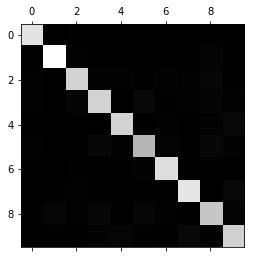

In [92]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# the more gray the higher the error

In [93]:
row_sums = conf_mx.sum(axis=1, keepdims=True)

In [94]:
norm_conf_mx = conf_mx / row_sums

In [95]:
np.fill_diagonal(norm_conf_mx, 0)

In [96]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 10), dpi=200, facecolor='w', edgecolor='k')

<Figure size 4000x2000 with 0 Axes>

<Figure size 4000x2000 with 0 Axes>

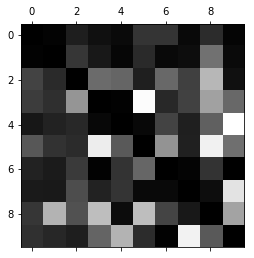

In [97]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [98]:
cl_a, cl_b = 3, 5

In [99]:
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [100]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

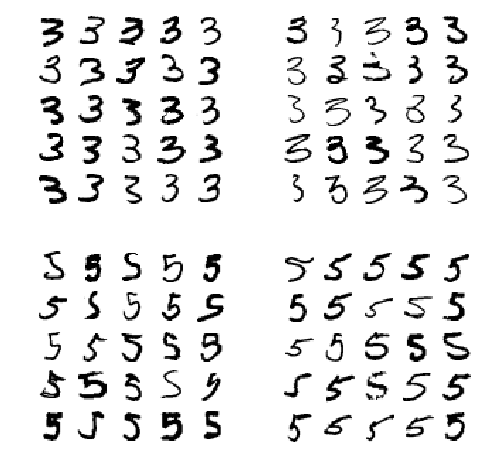

In [101]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

The two 5X5 blocks on the left show digits classified as 3s and the two 5X5 blocks on the right show images classified as 5s.

### Multilabel Classification

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
y_train_large = (y_train >= 7)

In [104]:
y_train_odd = (y_train % 2 == 1)

In [105]:
y_multilabel = np.c_[y_train_large, y_train_odd]

In [106]:
# we have mixed two categories in one
y_multilabel

array([[False, False],
       [False,  True],
       [False, False],
       ...,
       [False,  True],
       [False, False],
       [False,  True]])

In [107]:
knn_clf = KNeighborsClassifier()

In [108]:
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [109]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [110]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [111]:
f1_score(y_train, y_train_knn_pred, average="macro")

0.9684688940374354

It takes long time to do this KNN training on my old computer

Multioutput Classification

In [125]:
# creates an array of 60000 X 784 with random numbers between 0,100
noise = np.random.randint(0, 100, (len(X_train), 784))

# we add this noise to our training dataset
X_train_mod = X_train + noise

# we repeat for our test dataset
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# our labels will be our original training and test dataset
y_train_mod = X_train
y_test_mod = X_test

In [134]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"


In [138]:
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    

In [139]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

Saving figure noisy_digit_example_plot


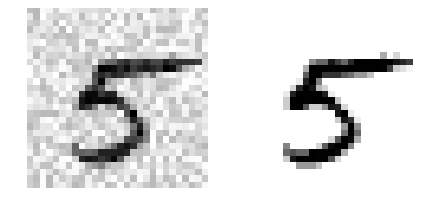

In [140]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

In [141]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [142]:
clean_digit = knn_clf.predict([X_test_mod[some_index]])

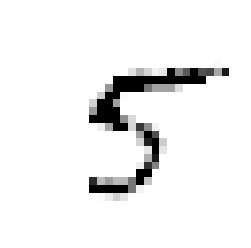

In [143]:
plot_digit(clean_digitn_digit)